In [1]:
# import necessary packages

import numpy as np
import os
import pandas as pd
import tqdm
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
import random
#import skimage._shared.utils #import channel_as_last_axis
import zipfile
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow import keras
import tensorflow as tf
import os
import pandas as pd
import tqdm
import glob
from astropy.io import fits
import random
import tensorflow as tf
import timeit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

2024-10-22 10:29:48.720072: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 10:29:50.976977: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 10:29:51.361315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 10:29:52.001832: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-22 10:29:52.132182: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-22 10:29:53.914359: I tensorflow/core/platform/cpu_feature_gu

In [3]:
import pickle

In [17]:
tf.__version__

'2.17.0'

In [2]:
import pickle
import seaborn as sns

In [3]:
X_train = np.load('/mn/stornext/u3/chegenia/SAMI_project/augmented_data/x_train.npy')
y_train = np.load('/mn/stornext/u3/chegenia/SAMI_project/augmented_data/y_train.npy')
X_test = np.load('/mn/stornext/u3/chegenia/SAMI_project/augmented_data/x_test.npy')
y_test = np.load('/mn/stornext/u3/chegenia/SAMI_project/augmented_data/y_test.npy')
train_label = np.load('/mn/stornext/u3/chegenia/SAMI_project/augmented_data/train_label.npy')
test_label = np.load('/mn/stornext/u3/chegenia/SAMI_project/augmented_data/test_label.npy')
with open('/mn/stornext/u3/chegenia/SAMI_project/augmented_data/unknown_samples.pkl', 'rb') as pickle_file:
    unknown_samples = pickle.load(pickle_file)

In [4]:
X_train.shape

(15532, 40, 40)

In [5]:
X_train = np.expand_dims(X_train,axis=-1)
y_train = np.expand_dims(y_train,axis=-1)
X_test = np.expand_dims(X_test,axis=-1)
y_test = np.expand_dims(y_test,axis=-1)

In [ ]:
X_train.shape

## CM

In [20]:


def confusion(pred, y_test, threshold):
    confusion = confusion_matrix(y_test, np.where(pred > threshold, 1, 0))
    FP = confusion[0][1]
    TN = confusion[0][0]
    TP = confusion[1][1]
    FN = confusion[1][0]
    fpr = FP / (FP + TN)
    tpr = TP / (TP + FN)

    # Calculate accuracy and precision
    accuracy = (TP + TN) / (TP + TN + FP + FN)  # Accuracy
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0  # Precision
    
    fpr = FP / (FP + TN)
    tpr = TP / (TP + FN)
    
    return confusion, tpr, fpr, accuracy, precision

# Load and compile your model
model = tf.keras.models.load_model("/mn/stornext/u3/chegenia/SAMI_project/cnn_model/best_cnn_model.h5")
model.load_weights("/mn/stornext/u3/chegenia/SAMI_project/cnn_model/best_weights.weights.h5")
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
threshold = 0.5
pred = model.predict(X_test)

# Compute confusion matrix
confusion_matrix, tpr, fpr, accuracy, precision = confusion(pred, y_test, threshold)

119/119 [==============================] - 1s 7ms/step


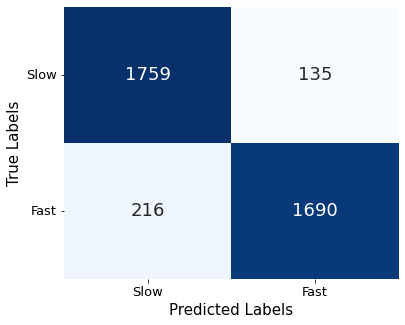

In [25]:
# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, linecolor='white', linewidths=0, annot_kws={"size": 18})  # Removed colorbar and cross lines
plt.xlabel('Predicted Labels', fontsize=15)
plt.ylabel('True Labels', fontsize=15)
#plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['Slow', 'Fast'], fontsize=13)  # Labeling x-axis
plt.yticks(ticks=[0.5, 1.5], labels=['Slow', 'Fast'], rotation=0, fontsize=13)  # Labeling y-axis
plt.savefig('/mn/stornext/u3/chegenia/SAMI_project/results/confusion_matrix.pdf')  # Save the confusion matrix figure
plt.show()

In [26]:
print(accuracy, precision)

0.9076315789473685 0.9260273972602739


In [7]:
fpr

0.048574445617740235

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.optimizers import Adam
import tqdm

In [9]:
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.optimizers import Adam
import tqdm

from keras.models import load_model

def confusion(pred,y_test,threshold):
    confusion = confusion_matrix(y_test,np.where(pred > threshold, 1, 0))
    #print(confusion)
    FP = confusion[0][1]
    TN = confusion[0][0] 
    TP = confusion[1][1]
    FN = confusion[1][0]
    fpr = FP/(FP+TN)
    tpr = TP/(TP+FN)
    return tpr, fpr


def model_load(X_test, y_test, iteration):
    x = []
    y = []
    model = tf.keras.models.load_model("/mn/stornext/u3/chegenia/SAMI_project/cnn_model/best_cnn_model.h5")
    model.summary()
    model.load_weights("/mn/stornext/u3/chegenia/SAMI_project/cnn_model/best_weights.weights.h5")
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    mc_predictions1 = []
    for i in tqdm.tqdm(range(iteration)):
        y_p = model.predict(X_test)
        y_p = y_p.squeeze(1)
        #y_p = y_p.reshape(-1, 1)
        print(y_p.shape)
        mc_predictions1.append(y_p)
    mean = np.mean(mc_predictions1, axis=0)
    std = np.std(mc_predictions1, axis=0)

    for i in np.linspace(0.001, 0.999, 999):
        x1 = confusion(mean, y_test, i)[0]
        y1 = confusion(mean, y_test, i)[1]
        x.append(x1)
        y.append(y1)

    return mc_predictions1, mean, std, x, y

In [10]:
predictions_roc, mean_roc, std_roc, x_roc, y_roc = model_load(X_test,y_test,50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 19, 19, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                        

2024-10-13 10:40:42.686229: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /astro/local/mamba/envs/gpu/lib
2024-10-13 10:40:42.686260: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2024-10-13 10:40:42.686283: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (euclid22.uio.no): /proc/driver/nvidia/version does not exist
2024-10-13 10:40:42.686547: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
  0%|                                                    

119/119 [==============================] - 1s 5ms/step


  2%|██▏                                                                                                         | 1/50 [00:00<00:39,  1.24it/s]

(3800,)
119/119 [==============================] - 1s 5ms/step


  4%|████▎                                                                                                       | 2/50 [00:01<00:35,  1.34it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


  6%|██████▍                                                                                                     | 3/50 [00:02<00:35,  1.33it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


  8%|████████▋                                                                                                   | 4/50 [00:03<00:34,  1.32it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 10%|██████████▊                                                                                                 | 5/50 [00:03<00:33,  1.34it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 12%|████████████▉                                                                                               | 6/50 [00:04<00:33,  1.32it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 14%|███████████████                                                                                             | 7/50 [00:05<00:32,  1.32it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 16%|█████████████████▎                                                                                          | 8/50 [00:06<00:31,  1.32it/s]

(3800,)
119/119 [==============================] - 1s 5ms/step


 18%|███████████████████▍                                                                                        | 9/50 [00:06<00:30,  1.34it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 20%|█████████████████████▍                                                                                     | 10/50 [00:07<00:29,  1.36it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 22%|███████████████████████▌                                                                                   | 11/50 [00:08<00:29,  1.34it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 24%|█████████████████████████▋                                                                                 | 12/50 [00:09<00:28,  1.33it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 26%|███████████████████████████▊                                                                               | 13/50 [00:09<00:27,  1.33it/s]

(3800,)
119/119 [==============================] - 1s 5ms/step


 28%|█████████████████████████████▉                                                                             | 14/50 [00:10<00:25,  1.39it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 30%|████████████████████████████████                                                                           | 15/50 [00:11<00:25,  1.38it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 32%|██████████████████████████████████▏                                                                        | 16/50 [00:11<00:24,  1.37it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 34%|████████████████████████████████████▍                                                                      | 17/50 [00:12<00:24,  1.36it/s]

(3800,)
119/119 [==============================] - 1s 5ms/step


 36%|██████████████████████████████████████▌                                                                    | 18/50 [00:13<00:23,  1.37it/s]

(3800,)
119/119 [==============================] - 1s 5ms/step


 38%|████████████████████████████████████████▋                                                                  | 19/50 [00:14<00:22,  1.39it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 40%|██████████████████████████████████████████▊                                                                | 20/50 [00:14<00:22,  1.35it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 42%|████████████████████████████████████████████▉                                                              | 21/50 [00:15<00:21,  1.33it/s]

(3800,)
119/119 [==============================] - 1s 5ms/step


 44%|███████████████████████████████████████████████                                                            | 22/50 [00:16<00:20,  1.35it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 46%|█████████████████████████████████████████████████▏                                                         | 23/50 [00:17<00:20,  1.33it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 48%|███████████████████████████████████████████████████▎                                                       | 24/50 [00:17<00:19,  1.33it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 50%|█████████████████████████████████████████████████████▌                                                     | 25/50 [00:18<00:19,  1.31it/s]

(3800,)
119/119 [==============================] - 1s 5ms/step


 52%|███████████████████████████████████████████████████████▋                                                   | 26/50 [00:19<00:17,  1.35it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 54%|█████████████████████████████████████████████████████████▊                                                 | 27/50 [00:20<00:17,  1.34it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 56%|███████████████████████████████████████████████████████████▉                                               | 28/50 [00:20<00:16,  1.32it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 58%|██████████████████████████████████████████████████████████████                                             | 29/50 [00:21<00:15,  1.33it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 60%|████████████████████████████████████████████████████████████████▏                                          | 30/50 [00:22<00:14,  1.34it/s]

(3800,)
119/119 [==============================] - 1s 5ms/step


 62%|██████████████████████████████████████████████████████████████████▎                                        | 31/50 [00:23<00:13,  1.36it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 64%|████████████████████████████████████████████████████████████████████▍                                      | 32/50 [00:23<00:13,  1.37it/s]

(3800,)
119/119 [==============================] - 1s 4ms/step


 66%|██████████████████████████████████████████████████████████████████████▌                                    | 33/50 [00:24<00:11,  1.49it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 68%|████████████████████████████████████████████████████████████████████████▊                                  | 34/50 [00:25<00:11,  1.43it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 70%|██████████████████████████████████████████████████████████████████████████▉                                | 35/50 [00:25<00:10,  1.38it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 72%|█████████████████████████████████████████████████████████████████████████████                              | 36/50 [00:26<00:10,  1.35it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 74%|███████████████████████████████████████████████████████████████████████████████▏                           | 37/50 [00:27<00:09,  1.32it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 76%|█████████████████████████████████████████████████████████████████████████████████▎                         | 38/50 [00:28<00:09,  1.31it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 39/50 [00:29<00:08,  1.31it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 80%|█████████████████████████████████████████████████████████████████████████████████████▌                     | 40/50 [00:29<00:07,  1.31it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 82%|███████████████████████████████████████████████████████████████████████████████████████▋                   | 41/50 [00:30<00:06,  1.30it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 42/50 [00:31<00:06,  1.30it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 86%|████████████████████████████████████████████████████████████████████████████████████████████               | 43/50 [00:32<00:05,  1.30it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 88%|██████████████████████████████████████████████████████████████████████████████████████████████▏            | 44/50 [00:32<00:04,  1.31it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 90%|████████████████████████████████████████████████████████████████████████████████████████████████▎          | 45/50 [00:33<00:03,  1.32it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 46/50 [00:34<00:02,  1.34it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 47/50 [00:35<00:02,  1.32it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 48/50 [00:35<00:01,  1.33it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 49/50 [00:36<00:00,  1.35it/s]

(3800,)
119/119 [==============================] - 1s 6ms/step


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:37<00:00,  1.34it/s]

(3800,)


In [16]:
np.save('/mn/stornext/u3/chegenia/SAMI_project/results/predictions_roc.npy',predictions_roc)
np.save('/mn/stornext/u3/chegenia/SAMI_project/results/mean_roc.npy',mean_roc)
np.save('/mn/stornext/u3/chegenia/SAMI_project/results/std_roc.npy',std_roc)
np.save('/mn/stornext/u3/chegenia/SAMI_project/results/x_roc.npy',x_roc)
np.save('/mn/stornext/u3/chegenia/SAMI_project/results/y_roc.npy',y_roc)

In [6]:
mean_roc = np.load('/mn/stornext/u3/chegenia/SAMI_project/results/mean_roc.npy')
std_roc = np.load('/mn/stornext/u3/chegenia/SAMI_project/results/std_roc.npy')
x_roc = np.load('/mn/stornext/u3/chegenia/SAMI_project/results/x_roc.npy')
y_roc = np.load('/mn/stornext/u3/chegenia/SAMI_project/results/y_roc.npy')

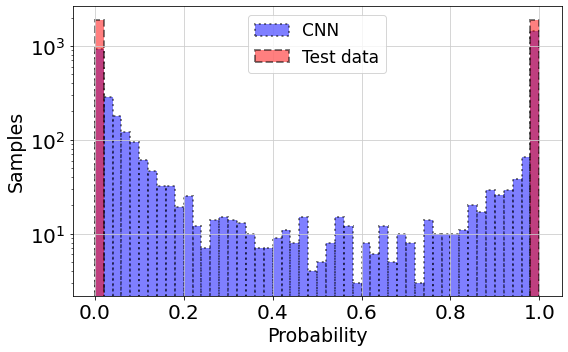

In [27]:

plt.figure(figsize=(8, 5))


#plt.bar(org_lrg_compact,alpha = 0.5,color = "b" ,linestyle='dashed',lw=1,label='Vanilla', edgecolor = 'black', align='center')
plt.hist(mean_roc,bins = 50,alpha = 0.5,color = "b",linestyle='dotted', lw=2,label='CNN ', edgecolor = 'black')
plt.hist(y_test,bins =50,alpha = 0.5,color = "r",linestyle='dashed', lw=2,label='Test data', edgecolor = 'black')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.xscale('log')
#plt.xticks(np.round(y_dense,6)[998])
plt.xlabel('Probability',size=19)
plt.ylabel('Samples',size=19)
#plt.ylim(0,0.3)

plt.yscale('log')
plt.legend(loc='upper center',fontsize = 17)
plt.tight_layout()
plt.savefig('/mn/stornext/u3/chegenia/SAMI_project/results/mean_dist.pdf', bbox_inches='tight')
plt.show()

(array([2165.,  226.,  174.,  179.,  253.,  400.,  125.,   79.,   93.,
         106.]),
 array([0.00000000e+00, 7.15255766e-08, 1.43051153e-07, 2.14576716e-07,
        2.86102306e-07, 3.57627869e-07, 4.29153431e-07, 5.00678993e-07,
        5.72204613e-07, 6.43730175e-07, 7.15255737e-07]),
 <BarContainer object of 10 artists>)

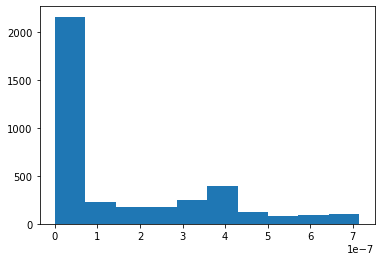

In [12]:
plt.hist(std_roc)

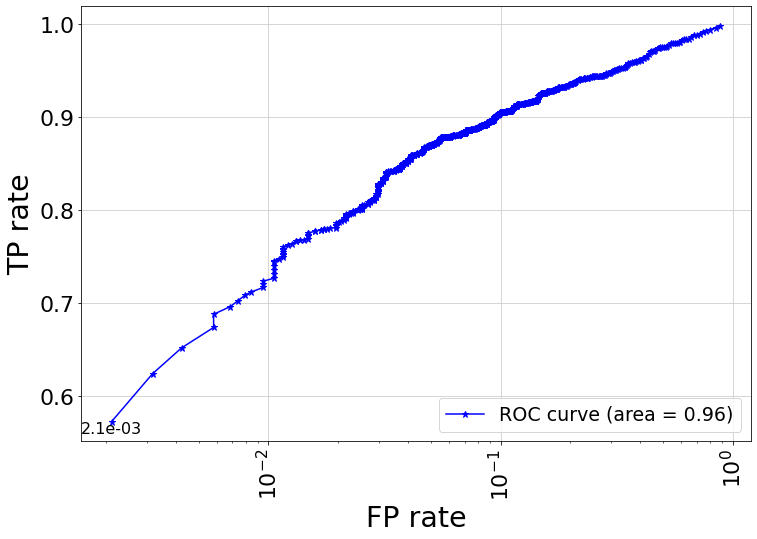

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"

plt.figure(figsize=(12, 8))
markersize = 7

roc_auc = roc_auc_score(y_test, mean_roc)

plt.plot(y_roc, x_roc,'b', marker='*', lw=1.5, markersize=markersize, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


plt.xlabel('FP rate',size=28.5)
plt.ylabel('TP rate',size=28.5)
#plt.xlim(0,0.025)
plt.xticks(rotation = 90) 
plt.annotate('%.1e'%y_roc[998], xy=(np.round(y_roc,6)[998], np.round(x_roc,6)[998]), xytext=(np.round(y_roc,6)[998], np.round(x_roc,6)[998]),
             fontsize=16, ha='center', va='top', xycoords='data',textcoords='offset points')


#plt.annotate(np.round(y_b3,6)[998], xy=(np.round(y_b3,6)[998], np.round(x_b3,6)[998]), xytext=(np.round(y_b3,6)[998], np.round(x_b3,6)[998]),
 #            fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')

#plt.annotate(np.round(y_b3_dense121,6)[998], xy=(np.round(y_b3_dense121,6)[998], np.round(x_b3_dense121,6)[998]), xytext=(np.round(y_b3,6)[998], np.round(x_b3,6)[998]),
             #fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')

#plt.annotate(np.round(y_dense121,6)[998], xy=(np.round(y_dense121,6)[998], np.round(x_dense121,6)[998]), xytext=(np.round(y_dense121,6)[998], np.round(x_dense121,6)[998]),
             #fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')

plt.xscale('log')

#plt.xlim(1e-4,0.1)
#plt.ylim(0.87,1)
#plt.title('ROC (Vanilla model)',fontsize = 25)
#plt.ylim(0,0.7)
plt.grid(True)
plt.legend(loc='lower right',fontsize = 19,fancybox=True)
#plt.savefig('/mn/stornext/u3/chegenia/SAMI_project/results/roc.pdf', bbox_inches='tight')
plt.show()

In [30]:
roc_auc

0.9574655038111184

In [17]:
import pandas as pd

# Load the training history from the CSV file
history_df = pd.read_csv('/mn/stornext/u3/chegenia/SAMI_project/cnn_model/training_history.csv')

# If you need to convert the DataFrame back to a dictionary format (like 'history.history')
history = history_df.to_dict(orient='list')

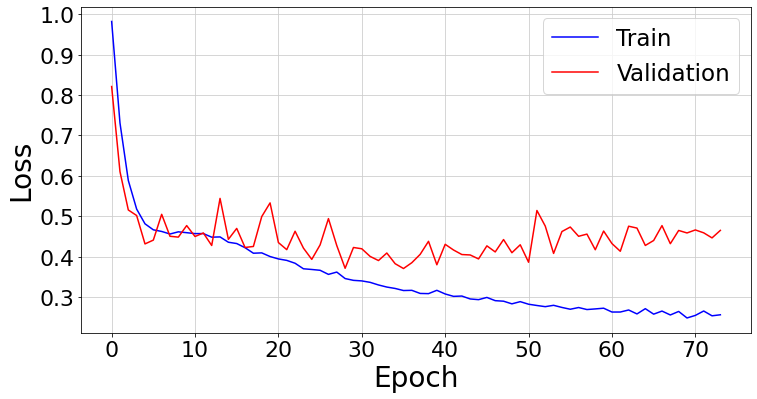

In [31]:
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"

plt.figure(figsize=(12, 6))
markersize = 7


plt.plot(history['loss'],'b',label="Train", lw=1.5, markersize=markersize)
plt.plot(history['val_loss'],'r',label="Validation", lw=1.5, markersize=markersize)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


plt.xlabel('Epoch',size=28)
plt.ylabel('Loss',size=28)
#plt.xlim(0,0.025)
#plt.xticks(rotation = 90) 
#plt.annotate('%.1e'%y_roc[98], xy=(np.round(y_roc,6)[98], np.round(x_roc,6)[98]), xytext=(np.round(y_roc,6)[98], np.round(x_roc,6)[98]),
             #fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')


#plt.annotate(np.round(y_b3,6)[998], xy=(np.round(y_b3,6)[998], np.round(x_b3,6)[998]), xytext=(np.round(y_b3,6)[998], np.round(x_b3,6)[998]),
 #            fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')

#plt.annotate(np.round(y_b3_dense121,6)[998], xy=(np.round(y_b3_dense121,6)[998], np.round(x_b3_dense121,6)[998]), xytext=(np.round(y_b3,6)[998], np.round(x_b3,6)[998]),
             #fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')

#plt.annotate(np.round(y_dense121,6)[998], xy=(np.round(y_dense121,6)[998], np.round(x_dense121,6)[998]), xytext=(np.round(y_dense121,6)[998], np.round(x_dense121,6)[998]),
             #fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')

#plt.xscale('log')

#plt.xlim(1e-4,0.1)
#plt.ylim(0.87,1)
#plt.title('ROC (Vanilla model)',fontsize = 25)
#plt.ylim(0,0.7)
plt.grid(True)
plt.legend(loc='upper right',fontsize = 23,fancybox=True,title_fontsize=16)
plt.savefig('/mn/stornext/u3/chegenia/SAMI_project/results/loss.pdf', bbox_inches='tight')
plt.show()

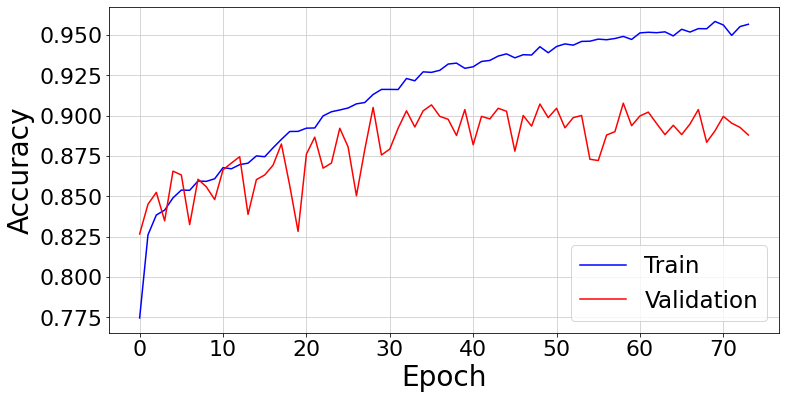

In [32]:
import matplotlib.pyplot as plt

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"

plt.figure(figsize=(12, 6))
markersize = 7


plt.plot(history['accuracy'],'b',label="Train", lw=1.5, markersize=markersize)
plt.plot(history['val_accuracy'],'r',label="Validation", lw=1.5, markersize=markersize)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


plt.xlabel('Epoch',size=28)
plt.ylabel('Accuracy',size=28)
#plt.xlim(0,0.025)
#plt.xticks(rotation = 90) 
#plt.annotate('%.1e'%y_roc[98], xy=(np.round(y_roc,6)[98], np.round(x_roc,6)[98]), xytext=(np.round(y_roc,6)[98], np.round(x_roc,6)[98]),
             #fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')


#plt.annotate(np.round(y_b3,6)[998], xy=(np.round(y_b3,6)[998], np.round(x_b3,6)[998]), xytext=(np.round(y_b3,6)[998], np.round(x_b3,6)[998]),
 #            fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')

#plt.annotate(np.round(y_b3_dense121,6)[998], xy=(np.round(y_b3_dense121,6)[998], np.round(x_b3_dense121,6)[998]), xytext=(np.round(y_b3,6)[998], np.round(x_b3,6)[998]),
             #fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')

#plt.annotate(np.round(y_dense121,6)[998], xy=(np.round(y_dense121,6)[998], np.round(x_dense121,6)[998]), xytext=(np.round(y_dense121,6)[998], np.round(x_dense121,6)[998]),
             #fontsize=15, ha='center', va='top', xycoords='data',textcoords='offset points')

#plt.xscale('log')

#plt.xlim(1e-4,0.1)
#plt.ylim(0.87,1)
#plt.title('ROC (Vanilla model)',fontsize = 25)
#plt.ylim(0,0.7)
plt.grid(True)
plt.legend(loc='lower right',fontsize = 23,fancybox=True,title_fontsize=16)
plt.savefig('/mn/stornext/u3/chegenia/SAMI_project/results/accuracy.pdf', bbox_inches='tight')
plt.show()

# Sample_analysis

In [8]:
troubeling_fp=np.where((mean_roc>0.98) & (y_test.squeeze(1)==0))[0]
troubeling_fp.shape

(22,)

In [9]:
troubeling_fp

array([  39,  224,  692,  725,  842, 1227, 1492, 1577, 1650, 1660, 1825,
       2216, 2728, 2741, 2784, 2792, 2799, 2925, 2982, 3499, 3551, 3667])

In [10]:
troubeling_fn=np.where((mean_roc<0.02)&(y_test.squeeze(1)==1))[0]
troubeling_fn.shape

(42,)

In [11]:
troubeling_tp=np.where((mean_roc>0.98)&(y_test.squeeze(1)==1))[0]
troubeling_tp.shape

(1428,)

In [12]:
troubeling_tn=np.where((mean_roc<0.02)&(y_test.squeeze(1)==0))[0]
troubeling_tn.shape

(889,)

In [13]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Circle

In [99]:
for j in range(0,len(ind),6):
    print(ind[j])

156


In [37]:
troubeling_fn

array([  36,   55,   76,   80,  472,  474,  526,  576,  613,  890,  925,
        938,  970, 1007, 1217, 1282, 1358, 1369, 1563, 1569, 1808, 1984,
       2055, 2075, 2278, 2285, 2292, 2582, 2607, 2854, 2903, 2911, 3015,
       3318, 3321, 3502, 3561, 3629, 3642, 3654, 3691, 3784])

In [39]:
for i in troubeling_fn:
    print(i,test_label[i], mean_roc[i])

36 107454_3064 0.009038804
55 252021_11321 0.014396544
76 48969_18632 0.0022703947
80 279878_14613 0.009199979
472 619105_4252 0.0128715215
474 290071_16886 0.008382461
526 47493_3745 0.0054483865
576 319293_5527 0.015267833
613 549313_14119 0.019819202
890 559490_5972 0.0044394294
925 204877_16822 0.0036489058
938 15481_11331 0.01284681
970 250277_16025 0.013574618
1007 543489_1927 0.013465291
1217 543860_5513 0.0052882894
1282 372374_5726 0.0027294774
1358 54270_3430 0.011930937
1369 549313_14120 0.016121624
1563 23265_9531 0.00019397531
1569 22633_13988 0.00476037
1808 15481_11332 0.005528657
1984 543860_5516 0.00022170234
2055 9352_18322 0.0033269322
2075 252021_11318 0.005171046
2278 623143_17327 0.0059720846
2285 85559_2595 0.019849064
2292 583637_14201 0.0017221348
2582 204877_16828 0.019751966
2607 215289_10678 0.009416139
2854 204877_16826 0.006944242
2903 559490_5977 0.0013790579
2911 9352_18325 0.008226393
3015 300613_1197 0.00070924294
3318 279878_14621 0.0010894128
3321 39

In [111]:
test_label[3592], y[3592]

('279261_1442', 0.9939385)

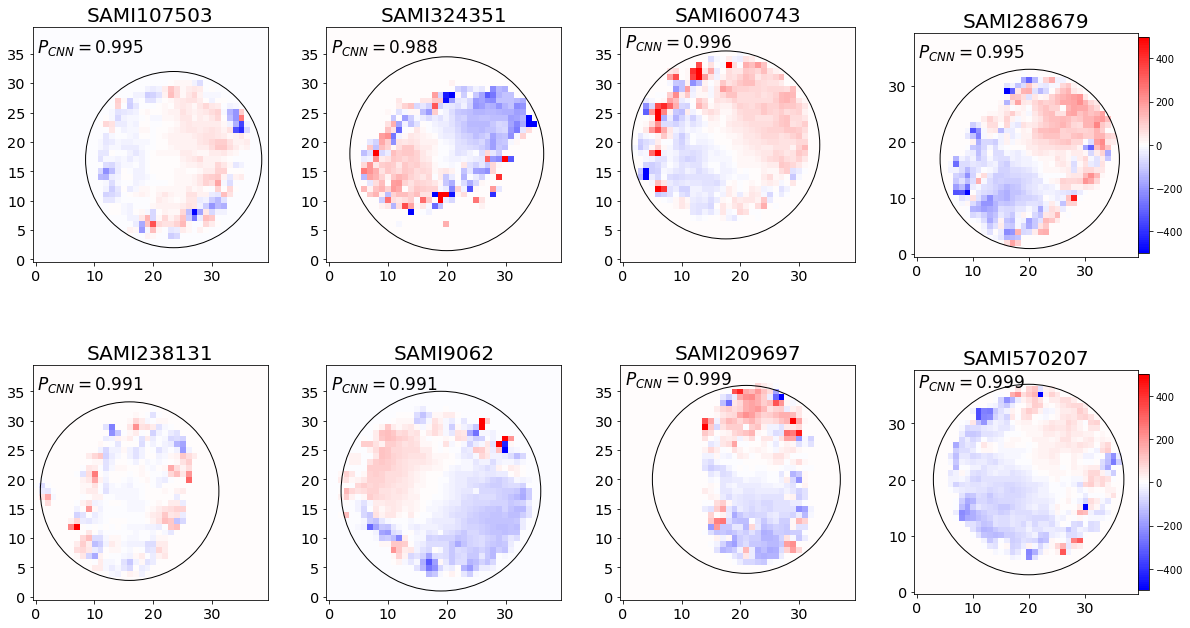

In [34]:
from matplotlib import pyplot
y=mean_roc
prd=X_test
ind = troubeling_fp

vmin, vmax = -500, 500

# Create a custom colormap
colors = ['blue', 'white', 'red']
n_bins = 100  # Number of bins in the colormap
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

def add_circle(ax, center, radius):
    circle = Circle(center, radius, fill=False, edgecolor='black', linewidth=1)
    ax.add_patch(circle)

    
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,20))

im0=axes[0][0].imshow(X_test[224],cmap=cmap, vmin=vmin, vmax=vmax)
axes[0][0].set_title("SAMI107503",fontsize=20)
axes[0][0].grid(False)
axes[0][0].invert_yaxis()  
axes[0][0].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im0,ax=axes[0][0],fraction=0.046, pad=0)
center00 = (23.5,17)  # Center of the image
radius00 = 15
add_circle(axes[0][0], center00, radius00)
axes[0][0].text(0.02, 0.96, f'$P_{{CNN}} = 0.995$', transform=axes[0][0].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')

    
im1=axes[0][1].imshow(X_test[39],cmap=cmap, vmin=vmin, vmax=vmax)
axes[0][1].set_title("SAMI324351",fontsize=20)
axes[0][1].grid(False)
axes[0][1].invert_yaxis()  
axes[0][1].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im1,ax=axes[0][1],fraction=0.046, pad=0)
center01 = (20,18)  # Center of the image
radius01 = 16.5
add_circle(axes[0][1], center01, radius01)
axes[0][1].text(0.02, 0.96, f'$P_{{CNN}} = 0.988$', transform=axes[0][1].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')

im2=axes[0][2].imshow(X_test[725],cmap=cmap, vmin=vmin, vmax=vmax)
axes[0][2].set_title("SAMI600743",fontsize=20)
axes[0][2].grid(False)
axes[0][2].invert_yaxis()  
axes[0][2].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im2,ax=axes[0][2],fraction=0.046, pad=0)
center02 = (17.5,19.5)  # Center of the image
radius02 = 16
add_circle(axes[0][2], center02, radius02)
axes[0][2].text(0.02, 0.98, f'$P_{{CNN}} = 0.996$', transform=axes[0][2].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')

im3=axes[0][3].imshow(X_test[2792],cmap=cmap, vmin=vmin, vmax=vmax)
axes[0][3].set_title("SAMI288679",fontsize=20)
axes[0][3].grid(False)
axes[0][3].invert_yaxis()  
axes[0][3].tick_params(axis='both', which='major', labelsize=14.5)
plt.colorbar(im3,ax=axes[0][3],fraction=0.046, pad=0)
center03 = (20.2,17)  # Center of the image
radius03 = 16
add_circle(axes[0][3], center03, radius03)
axes[0][3].text(0.02, 0.96, f'$P_{{CNN}} = 0.995$', transform=axes[0][3].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')

im4=axes[1][0].imshow(X_test[1577],cmap=cmap, vmin=vmin, vmax=vmax)
axes[1][0].set_title("SAMI238131",fontsize=20)
axes[1][0].grid(False)
axes[1][0].invert_yaxis()  
axes[1][0].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im4,ax=axes[1][0],fraction=0.046, pad=0)
center04 = (16,18)  # Center of the image
radius04 = 15.2
add_circle(axes[1][0], center04, radius04)
axes[1][0].text(0.02, 0.96, f'$P_{{CNN}} = 0.991$', transform=axes[1][0].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')


im5=axes[1][1].imshow(X_test[2799],cmap=cmap, vmin=vmin, vmax=vmax)
axes[1][1].set_title("SAMI9062",fontsize=20)
axes[1][1].grid(False)
axes[1][1].invert_yaxis()  
axes[1][1].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im5,ax=axes[1][1],fraction=0.046, pad=0)
center05 = (19,18)  # Center of the image
radius05 = 17
add_circle(axes[1][1], center05, radius05)
axes[1][1].text(0.02, 0.96, f'$P_{{CNN}} = 0.991$', transform=axes[1][1].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')
     
im6=axes[1][2].imshow(X_test[1660],cmap=cmap, vmin=vmin, vmax=vmax)
axes[1][2].set_title("SAMI209697",fontsize=20)
axes[1][2].grid(False)
axes[1][2].invert_yaxis()  
axes[1][2].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im6,ax=axes[1][2],fraction=0.046, pad=0)
center06 = (21,20)  # Center of the image
radius06 = 16
add_circle(axes[1][2], center06, radius06)
axes[1][2].text(0.02, 0.98, f'$P_{{CNN}} = 0.999$', transform=axes[1][2].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')

im7=axes[1][3].imshow(X_test[2216],cmap=cmap, vmin=vmin, vmax=vmax)
axes[1][3].set_title("SAMI570207",fontsize=20)
axes[1][3].grid(False)
axes[1][3].invert_yaxis()  
axes[1][3].tick_params(axis='both', which='major', labelsize=14.5)
plt.colorbar(im7,ax=axes[1][3],fraction=0.046, pad=0)
center07 = (20,20)  # Center of the image
radius07 = 17
add_circle(axes[1][3], center07, radius07)
axes[1][3].text(0.02, 0.99, f'$P_{{CNN}} = 0.999$', transform=axes[1][3].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')


pyplot.subplots_adjust(hspace=-0.55, wspace=0.25)

plt.savefig('/mn/stornext/u3/chegenia/SAMI_project/results/fp.pdf', dpi=300, bbox_inches='tight')

plt.show()

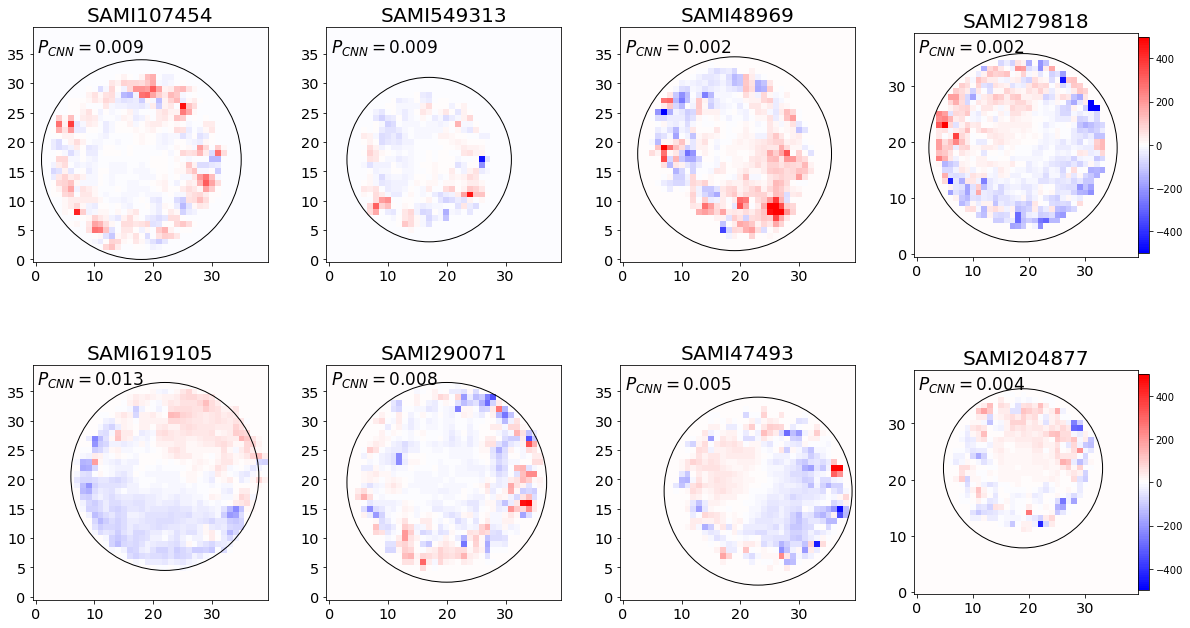

In [70]:
from matplotlib import pyplot
y=mean_roc
prd=X_test
ind = troubeling_fn

vmin, vmax = -500, 500

# Create a custom colormap
colors = ['blue', 'white', 'red']
n_bins = 100  # Number of bins in the colormap
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

def add_circle(ax, center, radius):
    circle = Circle(center, radius, fill=False, edgecolor='black', linewidth=1)
    ax.add_patch(circle)

    
fig,axes=plt.subplots(nrows=2,ncols=4,figsize=(20,20))

im0=axes[0][0].imshow(X_test[36],cmap=cmap, vmin=vmin, vmax=vmax)
axes[0][0].set_title("SAMI107454",fontsize=20)
axes[0][0].grid(False)
axes[0][0].invert_yaxis()  
axes[0][0].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im0,ax=axes[0][0],fraction=0.046, pad=0)
center00 = (18,17)  # Center of the image
radius00 = 17
add_circle(axes[0][0], center00, radius00)
axes[0][0].text(0.02, 0.96, f'$P_{{CNN}} = 0.009$', transform=axes[0][0].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')

    
im1=axes[0][1].imshow(X_test[613],cmap=cmap, vmin=vmin, vmax=vmax)
axes[0][1].set_title("SAMI549313",fontsize=20)
axes[0][1].grid(False)
axes[0][1].invert_yaxis()  
axes[0][1].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im1,ax=axes[0][1],fraction=0.046, pad=0)
center01 = (17,17)  # Center of the image
radius01 = 14
add_circle(axes[0][1], center01, radius01)
axes[0][1].text(0.02, 0.96, f'$P_{{CNN}} = 0.009$', transform=axes[0][1].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')

im2=axes[0][2].imshow(X_test[76],cmap=cmap, vmin=vmin, vmax=vmax)
axes[0][2].set_title("SAMI48969",fontsize=20)
axes[0][2].grid(False)
axes[0][2].invert_yaxis()  
axes[0][2].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im2,ax=axes[0][2],fraction=0.046, pad=0)
center02 = (19,18)  # Center of the image
radius02 = 16.5
add_circle(axes[0][2], center02, radius02)
axes[0][2].text(0.02, 0.96, f'$P_{{CNN}} = 0.002$', transform=axes[0][2].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')

im3=axes[0][3].imshow(X_test[80],cmap=cmap, vmin=vmin, vmax=vmax)
axes[0][3].set_title("SAMI279818",fontsize=20)
axes[0][3].grid(False)
axes[0][3].invert_yaxis()  
axes[0][3].tick_params(axis='both', which='major', labelsize=14.5)
plt.colorbar(im3,ax=axes[0][3],fraction=0.046, pad=0)
center03 = (19,19)  # Center of the image
radius03 = 16.8
add_circle(axes[0][3], center03, radius03)
axes[0][3].text(0.02, 0.98, f'$P_{{CNN}} = 0.002$', transform=axes[0][3].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')

im4=axes[1][0].imshow(X_test[472],cmap=cmap, vmin=vmin, vmax=vmax)
axes[1][0].set_title("SAMI619105",fontsize=20)
axes[1][0].grid(False)
axes[1][0].invert_yaxis()  
axes[1][0].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im4,ax=axes[1][0],fraction=0.046, pad=0)
center04 = (22,20.5)  # Center of the image
radius04 = 16
add_circle(axes[1][0], center04, radius04)
axes[1][0].text(0.02, 0.98, f'$P_{{CNN}} = 0.013$', transform=axes[1][0].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')


im5=axes[1][1].imshow(X_test[474],cmap=cmap, vmin=vmin, vmax=vmax)
axes[1][1].set_title("SAMI290071",fontsize=20)
axes[1][1].grid(False)
axes[1][1].invert_yaxis()  
axes[1][1].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im5,ax=axes[1][1],fraction=0.046, pad=0)
center05 = (20,19.5)  # Center of the image
radius05 = 17
add_circle(axes[1][1], center05, radius05)
axes[1][1].text(0.02, 0.98, f'$P_{{CNN}} = 0.008$', transform=axes[1][1].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')
     
im6=axes[1][2].imshow(X_test[526],cmap=cmap, vmin=vmin, vmax=vmax)
axes[1][2].set_title("SAMI47493",fontsize=20)
axes[1][2].grid(False)
axes[1][2].invert_yaxis()  
axes[1][2].tick_params(axis='both', which='major', labelsize=14.5)
#plt.colorbar(im6,ax=axes[1][2],fraction=0.046, pad=0)
center06 = (23,18)  # Center of the image
radius06 = 16
add_circle(axes[1][2], center06, radius06)
axes[1][2].text(0.02, 0.96, f'$P_{{CNN}} = 0.005$', transform=axes[1][2].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')

im7=axes[1][3].imshow(X_test[925],cmap=cmap, vmin=vmin, vmax=vmax)
axes[1][3].set_title("SAMI204877",fontsize=20)
axes[1][3].grid(False)
axes[1][3].invert_yaxis()  
axes[1][3].tick_params(axis='both', which='major', labelsize=14.5)
plt.colorbar(im7,ax=axes[1][3],fraction=0.046, pad=0)
center07 = (19,22)  # Center of the image
radius07 = 14.2
add_circle(axes[1][3], center07, radius07)
axes[1][3].text(0.02, 0.98, f'$P_{{CNN}} = 0.004$', transform=axes[1][3].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')


pyplot.subplots_adjust(hspace=-0.55, wspace=0.25)

plt.savefig('./results/fn.pdf', dpi=300, bbox_inches='tight')

plt.show()

# Model prediction on unknown data(prd)

In [14]:
un_samples = np.array(list(unknown_samples.values()))
un_ids = np.array(list(unknown_samples.keys()))

In [15]:
un_samples.shape, un_ids.shape

((944, 40, 40), (944,))

In [16]:
model = tf.keras.models.load_model("/mn/stornext/u3/chegenia/SAMI_project/cnn_model/best_cnn_model.h5")
model.load_weights("/mn/stornext/u3/chegenia/SAMI_project/cnn_model/best_weights.weights.h5")
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/mn/stornext/u3/chegenia/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/mn/stornext/u3/chegenia/.local/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/mn/stornext/u3/chegenia/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'Adam', because it has 2 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 9 objects could not be loaded. Example error message for object <Conv2D name=conv2d, built=True>:

Layer 'conv2d' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Conv2D name=conv2d, built=True>, <BatchNormalization name=batch_normalization, built=True>, <Conv2D name=conv2d_1, built=True>, <BatchNormalization name=batch_normalization_1, built=True>, <Conv2D name=conv2d_2, built=True>, <BatchNormalization name=batch_normalization_2, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]

In [78]:
y_prd = model.predict(np.expand_dims(un_samples,axis=-1))

30/30 [==============================] - 0s 5ms/step


In [79]:
y_prd.shape

(944, 1)

In [80]:
y_prd = y_prd.squeeze(1)

In [81]:
y_prd.shape

(944,)

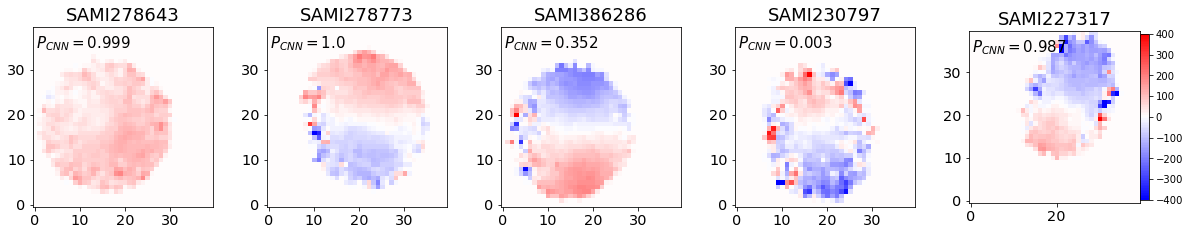

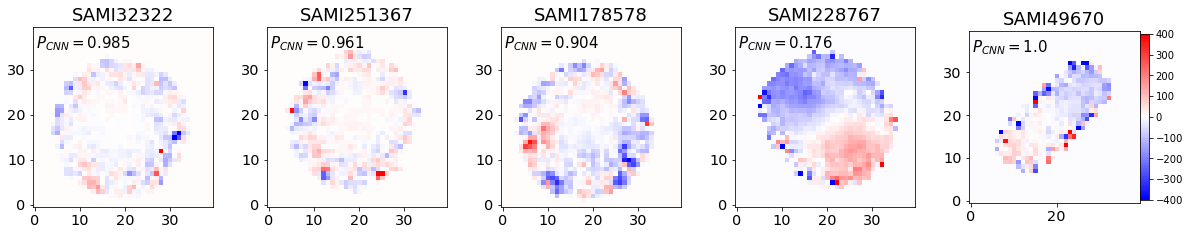

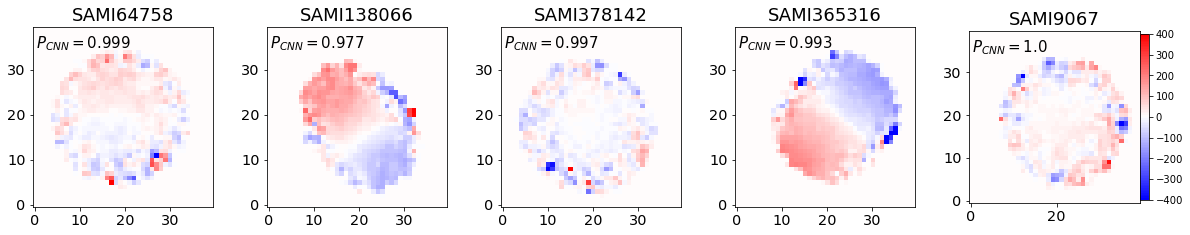

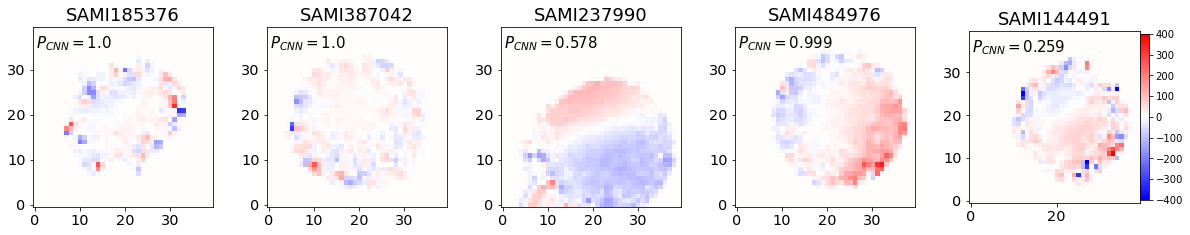

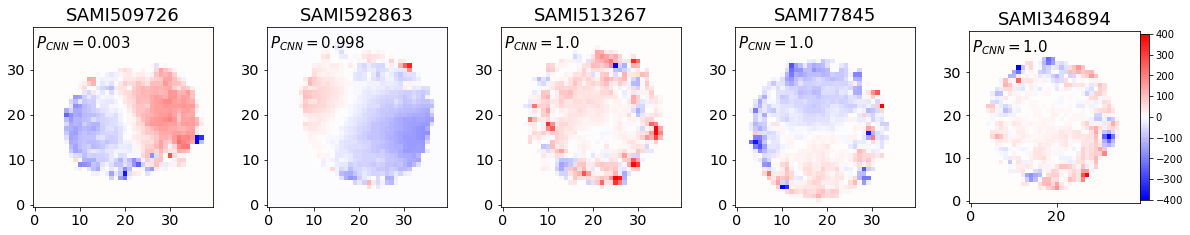

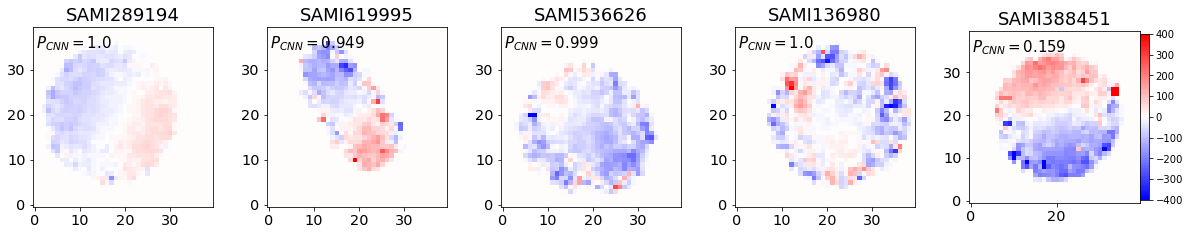

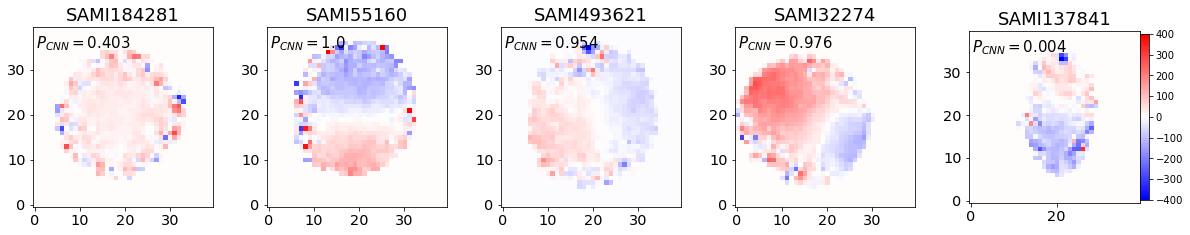

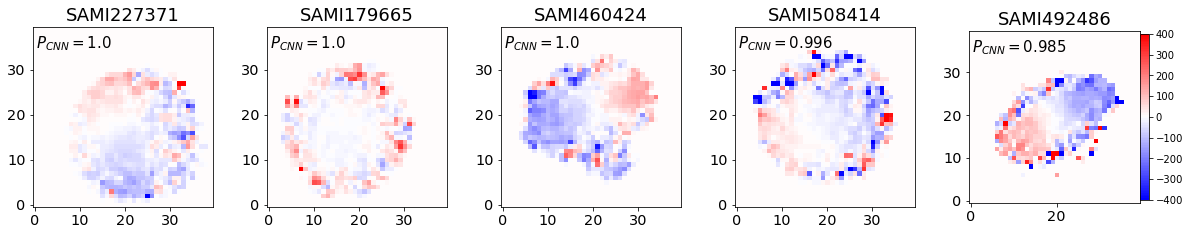

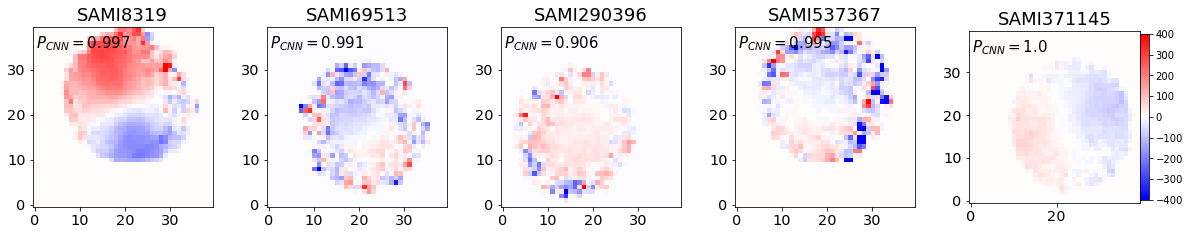

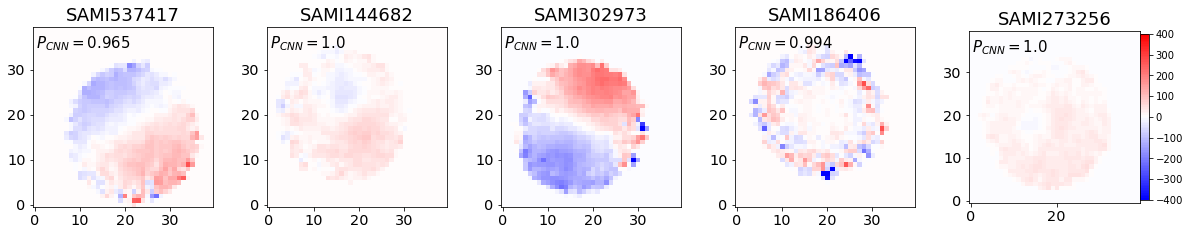

In [83]:
y=y_prd
prd=prd
for j in range(0,50,5):
    
    fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(20,20))

    """
    im7=axes[1][3].imshow(X_test[938],cmap=cmap, vmin=vmin, vmax=vmax)
    axes[1][3].set_title("SAMI15481",fontsize=20)
    axes[1][3].grid(False)
    axes[1][3].invert_yaxis()  
    axes[1][3].tick_params(axis='both', which='major', labelsize=14.5)
    plt.colorbar(im7,ax=axes[1][3],fraction=0.046, pad=0)
    center07 = (19,18)  # Center of the image
    radius07 = 18
    add_circle(axes[1][3], center07, radius07)
    axes[1][3].text(0.02, 0.96, f'$P_{{CNN}} = 0.015$', transform=axes[1][3].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')
    """

    im0=axes[0].imshow(prd[j],cmap=cmap, vmin=-400, vmax=400)
    axes[0].set_title(f"SAMI{un_ids[j]}",fontsize=18)
    axes[0].grid(False)
    axes[0].invert_yaxis()
    axes[0].tick_params(axis='both', which='major', labelsize=14.5)
    #plt.colorbar(im0,ax=axes[0],fraction=0.046, pad=0.04)
    pp0 = np.round(float(y_prd[j]),3)
    axes[0].text(0.02, 0.96, f'$P_{{CNN}} = {pp0}$', transform=axes[0].transAxes, fontsize=15,
    verticalalignment='top', horizontalalignment='left', color='black')

    im1=axes[1].imshow(prd[j+1],cmap=cmap, vmin=-400, vmax=400)
    axes[1].set_title(f"SAMI{un_ids[j+1]}",fontsize=18)
    axes[1].grid(False)
    axes[1].invert_yaxis()
    axes[1].tick_params(axis='both', which='major', labelsize=14.5)
    #plt.colorbar(im1,ax=axes[1],fraction=0.046, pad=0.04)
    pp1 = np.round(float(y_prd[j+1]),3)
    axes[1].text(0.02, 0.96, f'$P_{{CNN}} = {pp1}$', transform=axes[1].transAxes, fontsize=15,
    verticalalignment='top', horizontalalignment='left', color='black')

    im2=axes[2].imshow(prd[j+2],cmap=cmap, vmin=-400, vmax=400)
    axes[2].set_title(f"SAMI{un_ids[j+2]}",fontsize=18)
    axes[2].grid(False)
    axes[2].invert_yaxis()
    axes[2].tick_params(axis='both', which='major', labelsize=14.5)
    #plt.colorbar(im2,ax=axes[2],fraction=0.046, pad=0.04)
    pp2 = np.round(float(y_prd[j+2]),3)
    axes[2].text(0.02, 0.96, f'$P_{{CNN}} = {pp2}$', transform=axes[2].transAxes, fontsize=15,
    verticalalignment='top', horizontalalignment='left', color='black')

    im3=axes[3].imshow(prd[j+3],cmap=cmap, vmin=-400, vmax=400)
    axes[3].set_title(f"SAMI{un_ids[j+3]}",fontsize=18)
    axes[3].grid(False)
    axes[3].invert_yaxis()
    axes[3].tick_params(axis='both', which='major', labelsize=14.5)
    #plt.colorbar(im3,ax=axes[3],fraction=0.046, pad=0.04)
    pp3 = np.round(float(y_prd[j+3]),3)
    axes[3].text(0.02, 0.96, f'$P_{{CNN}} = {pp3}$', transform=axes[3].transAxes, fontsize=15,
    verticalalignment='top', horizontalalignment='left', color='black')
    
    im4=axes[4].imshow(prd[j+4],cmap=cmap, vmin=-400, vmax=400)
    axes[4].set_title(f"SAMI{un_ids[j+4]}",fontsize=18)
    axes[4].grid(False)
    axes[4].invert_yaxis()
    axes[4].tick_params(axis='both', which='major', labelsize=14.5)
    plt.colorbar(im4,ax=axes[4],fraction=0.046, pad=0)
    pp0 = np.round(float(y_prd[j+4]),3)
    axes[4].text(0.02, 0.96, f'$P_{{CNN}} = {pp0}$', transform=axes[4].transAxes, fontsize=15,
    verticalalignment='top', horizontalalignment='left', color='black')
    
    pyplot.subplots_adjust(hspace=0, wspace=0.3)
    

    plt.savefig(f'./results/prd{j}.pdf', dpi=300, bbox_inches='tight')

    plt.show()

### XAI

In [4]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.9/539.9 kB 1.2 MB/s eta 0:00:00 MB/s eta 0:00:01:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [24]:
import shap

/mn/alruba2/astro/local/mamba/envs/gpu/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


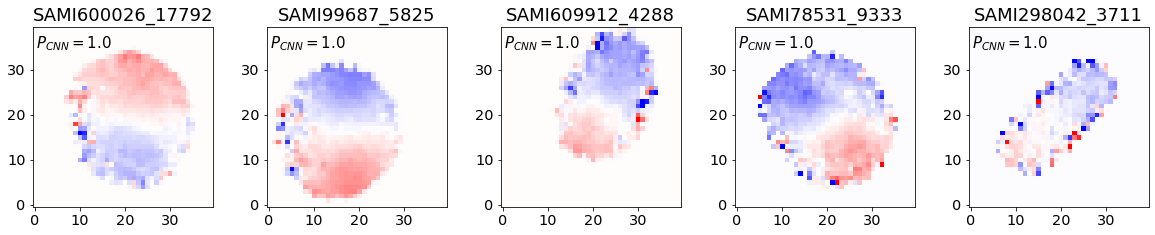

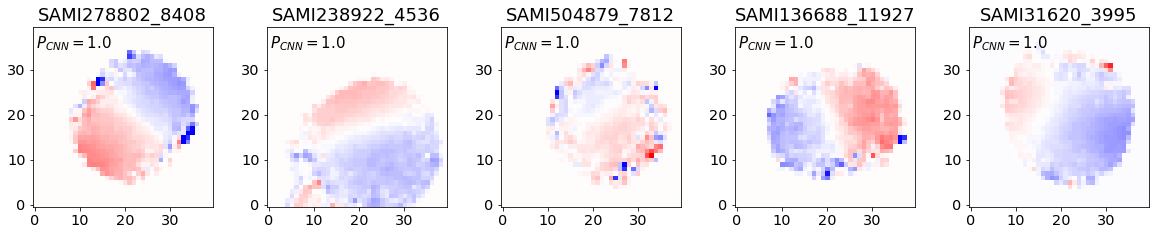

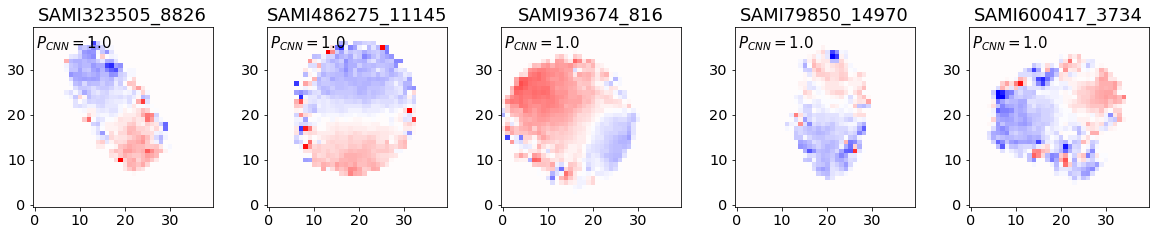

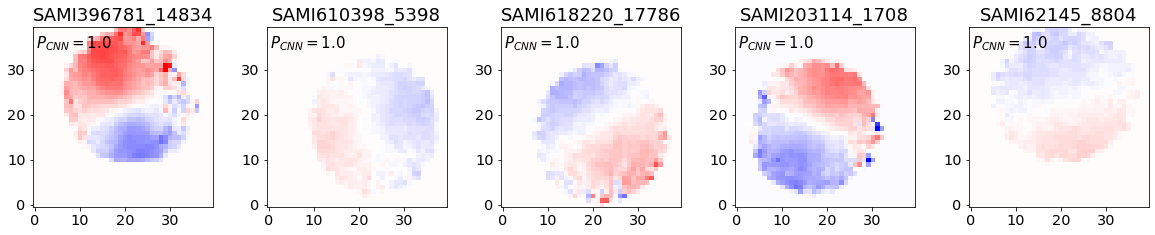

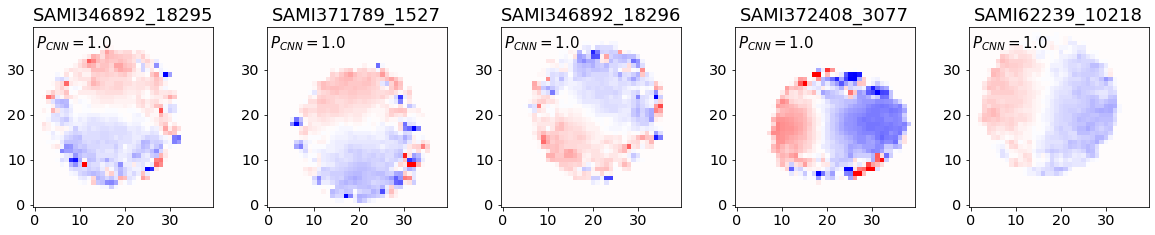

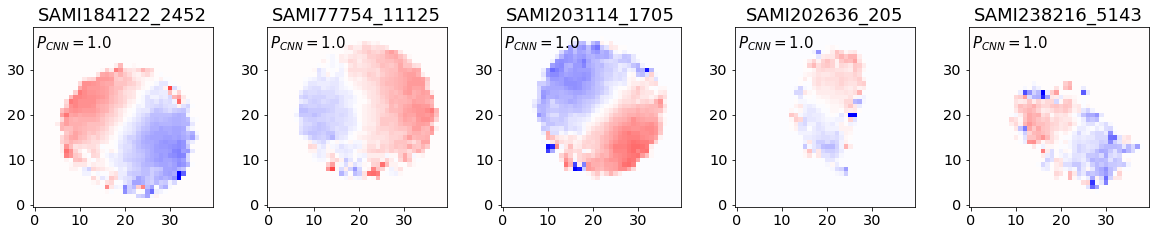

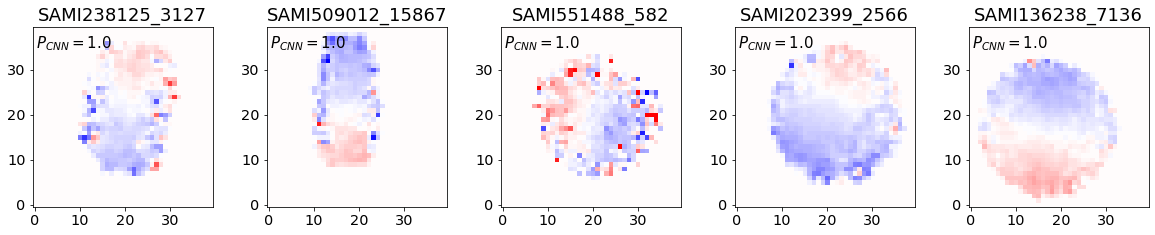

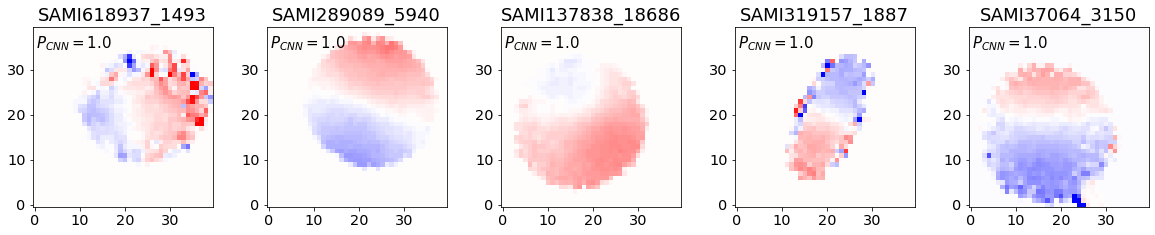

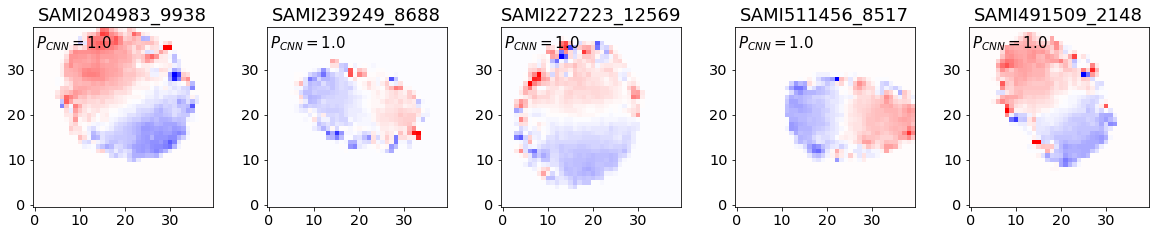

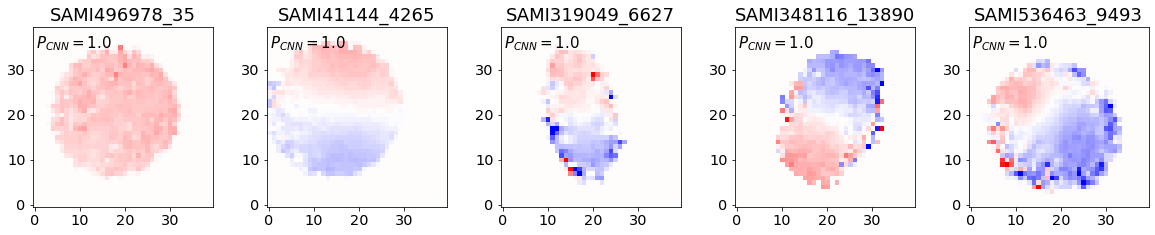

In [86]:
from matplotlib import pyplot

# Create a custom colormap
colors = ['blue', 'white', 'red']
n_bins = 100  # Number of bins in the colormap
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

y=y_test
prd = X_test
id = troubeling_tp
for j in range(0,50,5):
    
    fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(20,20))

    """
    im7=axes[1][3].imshow(X_test[938],cmap=cmap, vmin=vmin, vmax=vmax)
    axes[1][3].set_title("SAMI15481",fontsize=20)
    axes[1][3].grid(False)
    axes[1][3].invert_yaxis()  
    axes[1][3].tick_params(axis='both', which='major', labelsize=14.5)
    plt.colorbar(im7,ax=axes[1][3],fraction=0.046, pad=0)
    center07 = (19,18)  # Center of the image
    radius07 = 18
    add_circle(axes[1][3], center07, radius07)
    axes[1][3].text(0.02, 0.96, f'$P_{{CNN}} = 0.015$', transform=axes[1][3].transAxes, fontsize=17,
    verticalalignment='top', horizontalalignment='left', color='black')
    """

    im0=axes[0].imshow(prd[id[j]],cmap=cmap, vmin=-400, vmax=400)
    axes[0].set_title(f"SAMI{test_label[id[j]]}",fontsize=18)
    axes[0].grid(False)
    axes[0].invert_yaxis()
    axes[0].tick_params(axis='both', which='major', labelsize=14.5)
    #plt.colorbar(im0,ax=axes[0],fraction=0.046, pad=0.04)
    pp0 = np.round(float(y[id[j]]),3)
    axes[0].text(0.02, 0.96, f'$P_{{CNN}} = {pp0}$', transform=axes[0].transAxes, fontsize=15,
    verticalalignment='top', horizontalalignment='left', color='black')

    im1=axes[1].imshow(prd[id[j+1]],cmap=cmap, vmin=-400, vmax=400)
    axes[1].set_title(f"SAMI{test_label[id[j+1]]}",fontsize=18)
    axes[1].grid(False)
    axes[1].invert_yaxis()
    axes[1].tick_params(axis='both', which='major', labelsize=14.5)
    #plt.colorbar(im0,ax=axes[0],fraction=0.046, pad=0.04)
    pp1 = np.round(float(y[id[j+1]]),3)
    axes[1].text(0.02, 0.96, f'$P_{{CNN}} = {pp1}$', transform=axes[1].transAxes, fontsize=15,
    verticalalignment='top', horizontalalignment='left', color='black')

    im2=axes[2].imshow(prd[id[j+2]],cmap=cmap, vmin=-400, vmax=400)
    axes[2].set_title(f"SAMI{test_label[id[j+2]]}",fontsize=18)
    axes[2].grid(False)
    axes[2].invert_yaxis()
    axes[2].tick_params(axis='both', which='major', labelsize=14.5)
    #plt.colorbar(im0,ax=axes[0],fraction=0.046, pad=0.04)
    pp2 = np.round(float(y[id[j+2]]),3)
    axes[2].text(0.02, 0.96, f'$P_{{CNN}} = {pp2}$', transform=axes[2].transAxes, fontsize=15,
    verticalalignment='top', horizontalalignment='left', color='black')

    im3=axes[3].imshow(prd[id[j+3]],cmap=cmap, vmin=-400, vmax=400)
    axes[3].set_title(f"SAMI{test_label[id[j+3]]}",fontsize=18)
    axes[3].grid(False)
    axes[3].invert_yaxis()
    axes[3].tick_params(axis='both', which='major', labelsize=14.5)
    #plt.colorbar(im0,ax=axes[0],fraction=0.046, pad=0.04)
    pp3 = np.round(float(y[id[j+3]]),3)
    axes[3].text(0.02, 0.96, f'$P_{{CNN}} = {pp3}$', transform=axes[3].transAxes, fontsize=15,
    verticalalignment='top', horizontalalignment='left', color='black')
    
    im4=axes[4].imshow(prd[id[j+4]],cmap=cmap, vmin=-400, vmax=400)
    axes[4].set_title(f"SAMI{test_label[id[j+4]]}",fontsize=18)
    axes[4].grid(False)
    axes[4].invert_yaxis()
    axes[4].tick_params(axis='both', which='major', labelsize=14.5)
    #plt.colorbar(im0,ax=axes[0],fraction=0.046, pad=0.04)
    pp4 = np.round(float(y[id[j+4]]),3)
    axes[4].text(0.02, 0.96, f'$P_{{CNN}} = {pp4}$', transform=axes[4].transAxes, fontsize=15,
    verticalalignment='top', horizontalalignment='left', color='black')
    
    pyplot.subplots_adjust(hspace=0, wspace=0.3)
    

    #plt.savefig(f'./results/prd{j}.pdf', dpi=300, bbox_inches='tight')

    plt.show()

In [26]:
fp_samples = X_test[troubeling_fp]

tp_samples = X_test[troubeling_tp]

fn_samples = X_test[troubeling_fn]

tn_samples = X_test[troubeling_tn]

In [26]:
np.expand_dims(un_samples,axis=-1).shape

(944, 40, 40, 1)

In [30]:
tp_samples[0].shape

(40, 40, 1)

In [33]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 38.2 MB/s eta 0:00:0000:0100:01


In [38]:
import cv2

In [40]:
X_train.shape

(15532, 40, 40, 1)

In [42]:
# select a set of background examples to take an expectation over
background = X_train[np.random.choice(X_train.shape[0], 100, replace=False)]

In [43]:
background.shape

(100, 40, 40, 1)

In [49]:
# explain predictions of the model on three images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
#e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

In [48]:
shap_values = e.shap_values(tp_samples[0:5])

StagingError: in user code:

    File "/mn/stornext/u3/chegenia/.local/lib/python3.10/site-packages/shap/explainers/_deep/deep_tf.py", line 255, in grad_graph  *
        x_grad = tape.gradient(out, shap_rAnD)

    LookupError: gradient registry has no entry for: shap_FusedBatchNormV3


In [50]:
pip install --upgrade tensorflow shap

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 6.9 MB/s eta 0:00:0000:0100:01
  Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 97.9 MB/s eta 0:00:00:00:01
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 92.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 150.6 MB/s eta 0:00:0000:01
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl (6.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 152.4 MB/s eta 0:00:0000:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.0
    Uninstalling ml_dtypes-0.5.0:
      Successfully uninstalled ml_dtypes-0.5.0
  Consider adding this directory to PATH or, i

In [118]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def get_gradcam(model, img, layer_name="conv2d"):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(img, axis=0))
        loss = predictions[:, np.argmax(predictions[0])]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    conv_outputs = np.einsum('ijk,k->ijk', conv_outputs, pooled_grads)

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap

# Assuming 'model' is your trained CNN and 'img' is a test image
heatmap = get_gradcam(model, tp_samples[0])

In [119]:
heatmap.shape

(38, 38)

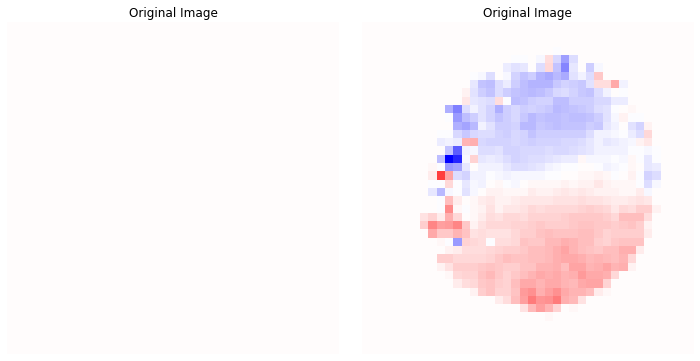

In [134]:
vmin, vmax = -500, 500

# Create a custom colormap
colors = ['blue', 'white', 'red']
n_bins = 100  # Number of bins in the colormap
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create a figure with 2 subplots

# Plot the original image on the right
axes[0].imshow(heatmap,cmap=cmap, vmin=-400, vmax=400)
axes[0].set_title('Original Image')
axes[0].axis('off')  # Hide axes

# Plot the original image on the right
axes[1].imshow(tp_samples[0],cmap=cmap, vmin=-400, vmax=400)
axes[1].set_title('Original Image')
axes[1].axis('off')  # Hide axes

# Show the figure
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

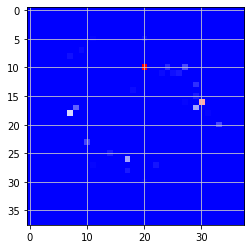

In [116]:

# Assuming 'model' is your trained CNN and 'img' is a test image
heatmap = get_gradcam(model, fp_samples[0])

# Plot heatmap
plt.imshow(heatmap,cmap=c)
plt.show()

In [83]:
indices = np.where(shap_val[3] > 0.01)

# Printing the indices
print(indices)

(array([13, 14, 14, 15, 15, 22, 25, 27, 29]), array([27, 20, 22, 26, 29, 10, 29, 17, 19]))


In [84]:
pix = x_test[3][indices]

In [86]:
x_test[1].min()

-578.122987861517

In [85]:
pix

array([[-105.38642561],
       [ -56.15764209],
       [ -75.88961272],
       [ -75.89609318],
       [-164.76131579],
       [ -19.61924813],
       [ -42.58623394],
       [ 100.29693157],
       [  22.23604975]])

In [47]:
maxi = np.array(shap_values)[0,1,:,:,0]>0.02
np.where(np.array(shap_values)[0,1,:,:,0][maxi])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),)

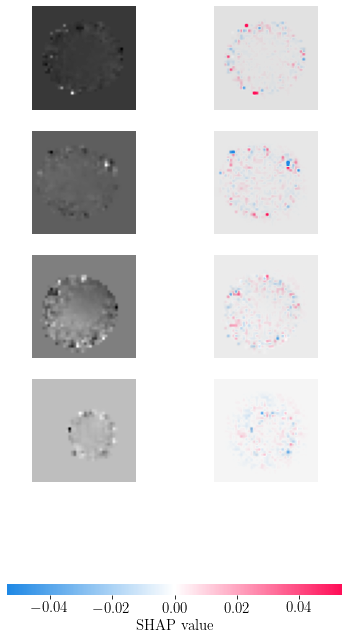

In [34]:
shap.image_plot(shap_values,x_test[1:5],show=False)

# TEST_ANALYSIS

In [2]:
!pip install transformers

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 50.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.5/435.5 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 94.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 26.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

messages = [
    {"role": "user", "content": "Who are you?"},
]
pipe = pipeline("text-generation", model="Tijmen2/cosmosage-v3")
pipe(messages)

/mn/alruba2/astro/local/mamba/envs/gpu/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer

# Access the underlying model and tokenizer
model = pipe.model
tokenizer = pipe.tokenizer

# Save the model and tokenizer
model.save_pretrained("/mn/stornext/u3/hassanif/amir/cosmosage/model")
tokenizer.save_pretrained("/mn/stornext/u3/hassanif/amir/cosmosage/tokenizer")

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load the saved model and tokenizer
model = AutoModelForCausalLM.from_pretrained("/mn/stornext/u3/hassanif/amir/cosmosage/model")
tokenizer = AutoTokenizer.from_pretrained("/mn/stornext/u3/hassanif/amir/cosmosage/tokenizer")

# Use the loaded model and tokenizer
# ...

In [103]:
!pip uninstall shap -y

Found existing installation: shap 0.45.1
Uninstalling shap-0.45.1:
  Successfully uninstalled shap-0.45.1


In [104]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 27.7 MB/s eta 0:00:00


In [135]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable
  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 143.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 127.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.4/315.4 kB 49.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 39.9 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=ec5db88f6c34b598f050709153f2e7fbc11e00756437fe3c6cf71e19e7c70199
  Stored in directory: /mn/stornext/u3/chegenia/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use 

In [ ]:
import lime
import lime.lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

# Assuming 'model' is your CNN model and 'image' is a single test image
explainer = lime.lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(image, model.predict, top_labels=5, hide_color=0, num_samples=1000)

# Show explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.show()

In [18]:
import tensorflow as tf
import numpy as np

class IntegratedGradients:
    def __init__(self, model, baseline=None):
        self.model = model
        self.baseline = baseline
        
    def interpolate_inputs(self, inputs, baseline, steps):
        """
        Create scaled inputs from baseline to input.
        """
        return [baseline + (float(i) / steps) * (inputs - baseline) for i in range(steps + 1)]
    
    def compute_gradients(self, inputs, target_class_idx=None):
        """
        Compute the gradients of the output w.r.t the input.
        """
        with tf.GradientTape() as tape:
            tape.watch(inputs)
            predictions = self.model(inputs)
            if target_class_idx is not None:
                predictions = predictions[:, target_class_idx]
        return tape.gradient(predictions, inputs)
    
    def integral_approximation(self, gradients):
        """
        Approximate the integral using the trapezoidal rule.
        """
        grads = tf.convert_to_tensor(gradients)  # Convert list to tensor
        grads = (grads[:-1] + grads[1:]) / 2.0   # Apply trapezoidal rule
        return tf.reduce_mean(grads, axis=0)
    
    def explain(self, inputs, target_class_idx=None, steps=50):
        """
        Calculate Integrated Gradients for the given inputs.
        """
        # If no baseline is provided, use an all-zero baseline.
        if self.baseline is None:
            self.baseline = tf.zeros_like(inputs)

        # 1. Generate interpolated inputs.
        interpolated_inputs = self.interpolate_inputs(inputs, self.baseline, steps)

        # 2. Compute gradients for each interpolated input.
        gradients = []
        for interpolated_input in interpolated_inputs:
            grads = self.compute_gradients(interpolated_input, target_class_idx)
            gradients.append(grads)
        
        # 3. Approximate the integral of the gradients.
        avg_gradients = self.integral_approximation(gradients)
        
        # 4. Multiply average gradients by the input difference (input - baseline).
        integrated_gradients = (inputs - self.baseline) * avg_gradients
        
        return integrated_gradients.numpy()


In [19]:
# Example usage:
# Assuming you have a model `my_model` and a test sample `x_test`
# Replace `my_model` with your actual model and `x_test` with your test input

ig = IntegratedGradients(model=model)

In [20]:
# Explain the model's prediction for a specific input (e.g., x_test[0])
input_data = tf.convert_to_tensor(tp_samples[0:10], dtype=tf.float32)

In [21]:
# Calculate integrated gradients for target class (optional: specify target_class_idx)
integrated_gradients = ig.explain(input_data, target_class_idx=None, steps=500)

In [22]:
integrated_gradients.shape

(10, 40, 40, 1)

In [23]:

# Create a custom colormap
colors = ['blue', 'white', 'red']
n_bins = 100  # Number of bins in the colormap
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)


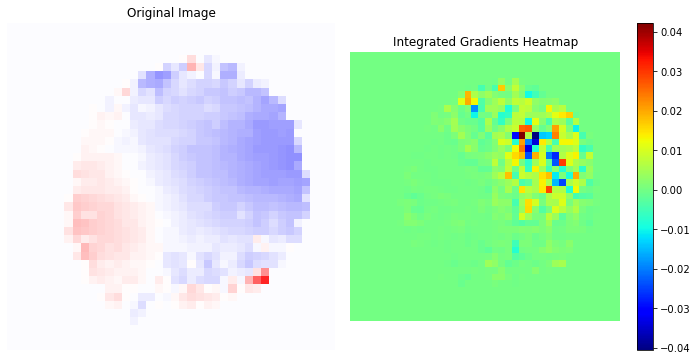

In [28]:
# Create a figure with 2 subplots (one for the original image and one for the heatmap)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns, 10x5 size

origin = np.squeeze(tp_samples[9]) 
# Plot the original image on the left subplot
axes[0].imshow(origin, cmap=cmap, vmin=-400, vmax=400)  # Use grayscale for the original image
axes[0].set_title("Original Image")
axes[0].axis('off')  # Turn off axis labels for cleaner look

ig_values = np.squeeze(integrated_gradients)  # Shape (40, 40)

# Plot the Integrated Gradients heatmap on the right subplot
im = axes[1].imshow(ig_values[9], cmap='jet')  # Use custom colormap
axes[1].set_title("Integrated Gradients Heatmap")
axes[1].axis('off')  # Turn off axis labels for cleaner look

# Add a colorbar for the heatmap
fig.colorbar(im, ax=axes[1])  # Color bar for the heatmap

# Display the plots
plt.tight_layout()
plt.show()

In [76]:
origin.shape

(40, 40)

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Compute Grad-CAM
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. Compute Grad-CAM
def compute_gradcam(model, img, layer_name, class_idx):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    guided_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(conv_outputs * guided_grads, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU to keep only positive contributions
    heatmap /= np.max(heatmap)  # Normalize heatmap
    return heatmap  # No need for .numpy() since it's already a NumPy array

# 2. Compute Guided Backpropagation
def compute_guided_backprop(model, img, class_idx):
    gb_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(model.layers[0].name).output]
    )

    with tf.GradientTape() as tape:
        inputs = tf.cast(img, tf.float32)
        tape.watch(inputs)
        outputs = model(inputs)[:, class_idx]
    
    grads = tape.gradient(outputs, inputs)[0]
    return grads.numpy()

# 3. Combine Grad-CAM and Guided Backpropagation
def guided_gradcam(gradcam, guided_backprop):
    return np.multiply(gradcam, guided_backprop)


In [36]:

# Compute Grad-CAM
gradcam = compute_gradcam(model, tp_samples[0:1], layer_name= 'conv2d', class_idx = 0)


In [38]:
# Compute Guided Backpropagation
guided_bp = compute_guided_backprop(model, tp_samples[0:1], class_idx=0)



In [39]:
# Compute Guided Grad-CAM
guided_gradcam_result = guided_gradcam(gradcam, guided_bp)


ValueError: operands could not be broadcast together with shapes (38,38) (40,40,1) 

In [59]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

# 1. Compute Grad-CAM (same as before)
def compute_gradcam(model, img, layer_name, class_idx):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    guided_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(conv_outputs * guided_grads, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # ReLU to keep only positive contributions
    heatmap /= np.max(heatmap)  # Normalize heatmap
    return heatmap  # Return as NumPy array

# 2. Compute Guided Backpropagation (same as before)
def compute_guided_backprop(model, img, class_idx):
    gb_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(model.layers[0].name).output]
    )

    with tf.GradientTape() as tape:
        inputs = tf.cast(img, tf.float32)
        tape.watch(inputs)
        outputs = model(inputs)[:, class_idx]
    
    grads = tape.gradient(outputs, inputs)[0]
    return grads.numpy()  # Return as NumPy array

# 3. Combine Grad-CAM and Guided Backpropagation
def guided_gradcam(gradcam, guided_backprop):
    # Squeeze the guided_backprop to remove last dimension if needed
    guided_backprop_squeezed = np.squeeze(guided_backprop)  # Shape (40, 40)
    
    # Resize gradcam to match the shape of guided_backprop if necessary
    if guided_backprop_squeezed.shape != gradcam.shape:
        # Resize gradcam to match guided_backprop shape
        gradcam_resized = zoom(gradcam, (guided_backprop_squeezed.shape[0] / gradcam.shape[0], 
                                          guided_backprop_squeezed.shape[1] / gradcam.shape[1]), order=1)
    else:
        gradcam_resized = gradcam
    
    return np.multiply(gradcam_resized, guided_backprop_squeezed)

# Usage example
img = tp_samples[8:9] # Preprocessed input image (batch of one sample)
layer_name = 'conv2d'  # Name of the final convolutional layer
class_idx = 0  # Index of the class to explain

# Compute Grad-CAM
gradcam = compute_gradcam(model, img, layer_name, class_idx)

# Compute Guided Backpropagation
guided_bp = compute_guided_backprop(model, img, class_idx)

# Compute Guided Grad-CAM
guided_gradcam_result = guided_gradcam(gradcam, guided_bp)

In [60]:
img.shape

(1, 40, 40, 1)

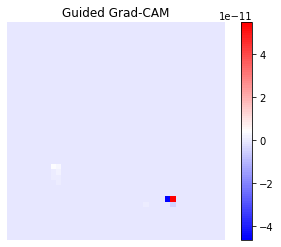

In [61]:
# Visualize
plt.imshow(guided_gradcam_result, cmap=cmap)
plt.colorbar()
plt.title("Guided Grad-CAM")
plt.axis('off')  # Turn off axis labels for clarity
plt.show()


In [46]:
guided_gradcam_result.shape

(40, 40)